このページでは統計初学者向けにローレンツ曲線とその意味、使い所について説明し、Pythonを使って実際にデータ解析を行ってみます。

**ローレンツ曲線とは**

ローレンツ曲線とは、横軸にも縦軸にも累積相対度数を使って、描いたグラフのことです。何かの偏りを示したいときに利用されることが多いです。

**ローレンツ曲線はどんな時に使うの？**

何か「これには偏りがあるのではないか？」と思ったら試しに書いてみるといいでしょう。

今回は日本人の年収に偏りがあるのかローレンツ曲線を使って見てみたいと思います。
[厚生労働省のHPから](https://www.mhlw.go.jp/toukei/saikin/hw/k-tyosa/k-tyosa15/index.html)から、[世帯別年収データ](https://www.mhlw.go.jp/toukei/saikin/hw/k-tyosa/k-tyosa15/xls/13.xls)をダウンロードして、jupyter labで作業をするディレクトリに置きます。私はnumbersで一度開いて、csvに変換しました。データは "data"ディレクトリの中にあります。

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

とりあえず、データを読み込んで中をのぞいてみましょう。

In [60]:
df = pd.read_csv('data/income.csv')
df

,Unnamed: 0,第５表 各種世帯別にみた所得金額階級別世帯数の分布及び中央値,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,平成27年調査,NaN,NaN,NaN
1,NaN,所 得 金 額 階 級,全世帯,NaN,高齢者世帯,NaN,児童のいる世帯,NaN,65歳以上の者の\nいる世帯,NaN,NaN,NaN,NaN
2,NaN,NaN,累積度数分布,相対度数分布,累積度数分布,相対度数分布,累積度数分布,相対度数分布,累積度数分布,相対度数分布,NaN,NaN,NaN
3,NaN,NaN,（％）,（％）,（％）,（％）,（％）,（％）,（％）,（％）,NaN,NaN,NaN
4,NaN,総 数,・,100.0,・,100.0,・,100.0,・,100.0,NaN,NaN,NaN
5,NaN,50 万 円 未 満,1.0,1.0,2.1,2.1,-,-,1.2,1.2,NaN,NaN,NaN
6,NaN,50～ 100,6.4,5.4,13.7,11.6,1.4,1.4,8.3,7.1,NaN,NaN,NaN
7,NaN,100～ 150,12.9,6.5,26.1,12.4,4.1,2.7,16.6,8.3,NaN,NaN,NaN
8,NaN,150～ 200,20.1,7.2,40.9,14.8,6.4,2.3,26.5,9.9,NaN,NaN,NaN
9,NaN,200～ 250,26.7,6.7,51.8,10.9,9.2,2.8,35.2,8.7,NaN,NaN,NaN


今回は全世帯の累積度数分布、相対度数分布の50万円未満〜1000万円以上のデータが必要なので、下のように適宜データを抜き出し、columnsとindexの名前をつけ直します。また、データがstringになっているので、floatに直します。

In [61]:
df.columns = df.loc[2]
df.index = df.iloc[0:24,1]
df = df.iloc[5:21,2:4]
df.iloc[:,0:2] = df.iloc[:,0:2].astype('float')
df

2,累積度数分布,相対度数分布
nan,,
50 万 円 未 満,1.0,1.0
50～ 100,6.4,5.4
100～ 150,12.9,6.5
150～ 200,20.1,7.2
200～ 250,26.7,6.7
250～ 300,34.0,7.3
300～ 350,41.1,7.1
350～ 400,47.1,6.0
400～ 450,52.0,4.9


年収500万円までは50万円刻み、500万円からは100万円刻みで階級が分けられています。そこで、一つの階級の集団の年収が平均を仮定して、(平均年収✖️世帯数)の相対度数を求めます。

例えば、200~250の階級の平均年収は225万円、600~700の階級の平均年収は650万円としています。
1000万円以上の階級の平均年収はだいたい2000万円というデータがありましたので、今回は2000万円として計算します。

計算できたらDataFrameを結合します。

In [62]:
arr1 = np.array([])

# 年収0~500万円までの階級をarr1にappendしていく。
for i in range(0,10):
    arr1 = np.append(arr1, df.iloc[i,1]/100 * (50 * i + 25))
    
# 年収500~1000万円までの階級をarr1にappendしていく。    
for i in range(0,5):
    arr1 = np.append(arr1, df.iloc[i,1]/100 * (100 * i + 550))
arr1 = np.append(arr1, df.iloc[15,1]/100 * 2000)
sum = np.sum(arr1)
arr1 = arr1/sum * 100

df1 = pd.DataFrame(arr1)
df1.index = df.index
df1 = df1.rename(columns={0:'(平均年収✖️世帯数)の相対度数'})
df = pd.concat([df, df1], axis=1)

続いて、(平均年収✖️世帯数)の累積相対度数を求めて、DataFrameを結合します。

In [63]:
arr2 = np.array([])
x = 0
for i in range(0,len(df.index)):
    x += df.iloc[i,2]
    arr2 = np.append(arr2, x)
df2 = pd.DataFrame(arr2)
df2.index = df.index
df2 = df2.rename(columns={0:'(平均年収✖️世帯数)の累積相対度数'})
df = pd.concat([df, df2], axis=1)

完成したDataFrameは下のとうりです。

In [64]:
df

,累積度数分布,相対度数分布,(平均年収✖️世帯数)の相対度数,(平均年収✖️世帯数)の累積相対度数
nan,,,,
50 万 円 未 満,1.0,1.0,0.041115,0.041115
50～ 100,6.4,5.4,0.666064,0.707179
100～ 150,12.9,6.5,1.336239,2.043417
150～ 200,20.1,7.2,2.072198,4.115615
200～ 250,26.7,6.7,2.479237,6.594852
250～ 300,34.0,7.3,3.301538,9.896390
300～ 350,41.1,7.1,3.794918,13.691308
350～ 400,47.1,6.0,3.700354,17.391662
400～ 450,52.0,4.9,3.424883,20.816545


これではよくわからないので、視覚的に捉えられるようにmatplotlibでグラフを作りましょう。

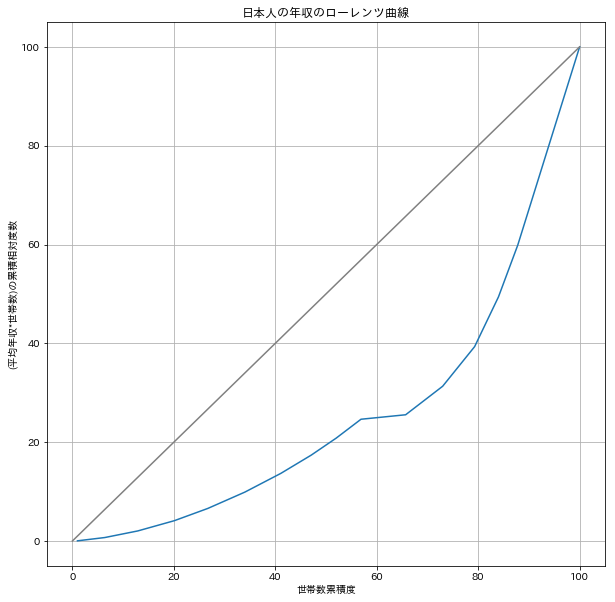

In [65]:
x = df.iloc[:,0]
y = df.iloc[:,3]
a = np.arange(0,110,10)
b = a

plt.figure(figsize=(10, 10))
plt.plot(x, y)
plt.plot(a,b,color='gray', linestyle='-',  label='plot')
plt.title('日本人の年収のローレンツ曲線') 
plt.xlabel('世帯数累積度') 
plt.ylabel('(平均年収*世帯数)の累積相対度数')
plt.grid() 
plt.show()

青色の曲線が今回書くことができた、ローレンツ曲線です。
両軸ともに累積相対度数を通っているので最終的に値が100%になることは直感的に理解できると思います。
ところで、y = x のグラフに比べて、下の方を伝っていることがわかると思います。
これこそが、年収の分布に不均一性が存在していることを示しています。

例えば、(平均年収*世帯数)の累積相対度数 = 20%のところで、だいたい、世帯数累積度 = 50%となっていますね。これは、日本人の年収の合計20%を年収の低い50%の人が受け取っているという意味になります。

また、平均年収*世帯数)の累積相対度数 = 40%、世帯数累積度 = 80%となっているところもありますね、これは高級どり上位20%の人が、日本人の年収合計の60%を所有しているということになります。うーん、年収の不均等は確かに存在していそうですね。

ちなみに y = x の直線をローレンツ曲線のグラフでは均等配分線と呼ばれ、直線のように分布していれば、年収の偏りは存在しないよいうことになります。逆に 均等配分線とローレンツ曲線で作られる三日月型の面積が多ければ大きいほど偏りが大きいということになります。